In [120]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Get the concentration vs. CNR plot

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21'
folder = r'Au\Two'  # Au or Gd

concentration = [19.67, 14.7525, 9.835, 6.5567, 4.9175, 1.967, 0]
cnr = np.load(os.path.join(directory, folder, f'CNR.npy'))

In [121]:
print(cnr)

[[[1.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00000000e+00 1.41421356e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.41421356e+00]]

 [[1.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00000000e+00 1.41421356e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.41421356e+00]]

 [[1.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00000000e+00 1.41421356e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.41421356e+00]]

 [[1.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00000000e+00 1.41421356e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.41421356e+00]]

 [[1.00000000e+00 2.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 

In [122]:
cnr = cnr[9:18]
print(cnr)

[[[1.56621741e+01 1.15702974e+01 7.59481883e+00 5.31261098e+00
   3.75936838e+00 1.29763888e+00 0.00000000e+00]
  [1.36158172e+00 1.65659438e+00 1.48640274e+00 1.25986827e+00
   1.38791284e+00 1.47697918e+00 1.41421356e+00]]

 [[4.67977687e+00 3.49327161e+00 2.62294868e+00 1.83868813e+00
   1.44343054e+00 4.54877122e-01 0.00000000e+00]
  [1.79157033e+00 1.69446516e+00 1.62277108e+00 1.43504056e+00
   1.39801103e+00 1.50673077e+00 1.41421356e+00]]

 [[9.67247025e+00 7.14914891e+00 4.68120636e+00 3.28214010e+00
   2.49254493e+00 8.66729790e-01 0.00000000e+00]
  [1.54958854e+00 1.60134311e+00 1.40188476e+00 1.43575004e+00
   1.37969256e+00 1.40845233e+00 1.41421356e+00]]

 [[9.64557792e+00 7.08599949e+00 4.69663205e+00 3.25192621e+00
   2.28445090e+00 9.05395087e-01 0.00000000e+00]
  [1.50761292e+00 1.54190882e+00 1.44694814e+00 1.46141204e+00
   1.40413340e+00 1.37081900e+00 1.41421356e+00]]

 [[7.89227781e+00 5.84095647e+00 3.87776287e+00 2.63758958e+00
   1.88032703e+00 7.90808210e-01 

In [123]:
cnr = np.delete(cnr, [1, 4, 5, 6, 7, 8], axis=0)
cnr = np.mean(cnr, axis=0)
print(cnr)

[[11.66007408  8.60181528  5.65755241  3.94889243  2.84545474  1.02325459
   0.        ]
 [ 1.47292773  1.59994877  1.44507855  1.38567678  1.3905796   1.41875017
   1.41421356]]


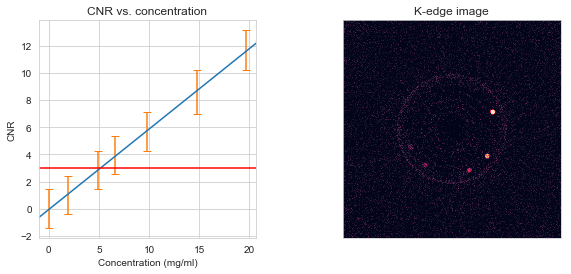

In [124]:
from scipy.stats import linregress
import seaborn as sns

# Get the linear regressions of the data
m, b, r2, p, std = linregress(concentration, cnr[0])
xpts = np.linspace(0-2, concentration[0]+2, 100)
ypts = m*xpts + b

# Find the minimum concentration
min_idx = np.abs(ypts - 3).argmin()
min_conc = xpts[min_idx]

data = np.load(os.path.join(directory, folder, 'K-edge.npy'))[12]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(xpts, ypts)
ax[0].errorbar(concentration, cnr[0], yerr=cnr[1], fmt='none', capsize=4)
ax[0].plot(xpts, 3*np.ones(len(xpts)), color='r')
ax[0].set_xlim([-1, concentration[0]+1])
ax[0].set_xlabel('Concentration (mg/ml)')
ax[0].set_ylabel('CNR')
ax[0].set_title('CNR vs. concentration')
ax[0].set_aspect(1./ax[0].axes.get_data_ratio())

ax[1].imshow(data, vmin=2, vmax=concentration[0])
ax[1].set_title('K-edge image')
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])
ax[1].grid(False)
# plt.subplots_adjust(wspace=0.1)
plt.show()


In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Get the concentration vs. CNR plot

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21'
folder = r'Gd\Two'  # Au or Gd

concentration = [50, 40, 30, 25, 20, 15, 10, 5, 0]
cnr = np.load(os.path.join(directory, folder, f'CNR.npy'))

In [126]:
print(cnr)

[[[           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]
  [           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]]

 [[           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]
  [           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]]

 [[           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]
  [           inf            inf            inf            inf
              inf            inf            inf            inf
              nan]]

 [[           inf            inf            inf            inf
              inf            inf            inf            in

In [127]:
cnr = cnr[6:15]
print(cnr)

[[[11.82428238 10.15949283  7.523676    4.89166814  3.21258133
    2.86585147  2.85001736  1.07947627  0.        ]
  [ 1.43456591  1.36275948  1.30596734  1.66941085  1.21315136
    1.12268754  1.41557066  1.28728545  1.41421356]]

 [[19.90835483 15.78715934 11.79263016  9.95507795  7.82046932
    5.96524586  4.09258608  2.5461627   0.        ]
  [ 1.5150256   1.45874209  1.38202675  1.24320799  1.3681644
    1.24674456  1.64086514  1.34648011  1.41421356]]

 [[22.16146853 17.79353303 13.23422608 11.09106521  8.69982534
    6.5453903   4.69414944  2.45878588  0.        ]
  [ 1.60672846  1.46358981  1.46792408  1.3153943   1.35112729
    1.34752596  1.30441521  1.27767862  1.41421356]]

 [[22.67668478 18.18515674 13.44688914 11.32888677  8.99842439
    6.73409951  4.60654255  2.57179256  0.        ]
  [ 1.48194682  1.35146428  1.47216134  1.29965848  1.23434345
    1.25864765  1.73138418  1.49515552  1.41421356]]

 [[ 8.91420243  7.38475342  5.68111679  4.93215956  4.00894148
    3.1980

In [128]:
cnr = np.delete(cnr, [1, 4, 5, 6, 7, 8], axis=0)
cnr = np.mean(cnr, axis=0)
print(cnr)

[[18.88747856 15.3793942  11.40159707  9.10387337  6.97027702  5.38178043
   4.05023645  2.0366849   0.        ]
 [ 1.50774706  1.39260452  1.41535092  1.42815454  1.26620737  1.24295372
   1.48379002  1.3533732   1.41421356]]


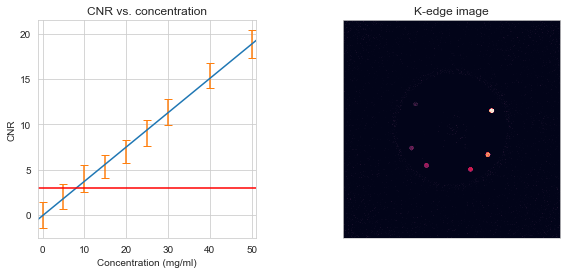

In [131]:
from scipy.stats import linregress
import seaborn as sns

# Get the linear regressions of the data
m, b, r2, p, std = linregress(concentration, cnr[0])
xpts = np.linspace(0-2, concentration[0]+2, 500)
ypts = m*xpts + b

# Find the minimum concentration
min_idx = np.abs(ypts - 3).argmin()
min_conc = xpts[min_idx]

data = np.load(os.path.join(directory, folder, 'K-edge.npy'))[12]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(xpts, ypts)
ax[0].errorbar(concentration, cnr[0], yerr=cnr[1], fmt='none', capsize=4)
ax[0].plot(xpts, 3*np.ones(len(xpts)), color='r')
ax[0].set_xlim([-1, concentration[0]+1])
ax[0].set_xlabel('Concentration (mg/ml)')
ax[0].set_ylabel('CNR')
ax[0].set_title('CNR vs. concentration')
ax[0].set_aspect(1./ax[0].axes.get_data_ratio())

ax[1].imshow(data, vmin=10, vmax=concentration[0])
ax[1].set_title('K-edge image')
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])
ax[1].grid(False)
# plt.subplots_adjust(wspace=0.1)
plt.show()